In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from functions import read_folder, read_bz2, split_by_time, find_burst, plot_burst, build_graph, findQuasiClique, find_original,find_event

In [3]:
#read the whole folder
path = "prim/data"
keyword = 'nokia'

#some words are not useful for events detection. for example, there are many ads with 'phone'
list_ignore = ['phone','smartphone']

#you can also specify the number of files with num = 10, for example
terms_stop, dates, whole_tweets, num_tweet, duree = read_folder(path, keyword, list_ignore)

100%|██████████| 65/65 [14:32<00:00, 13.43s/it]


In [4]:
print 'Cost time in s: ' + str(duree)
print 'Total number of tweets:' + str(num_tweet)
print 'Number of tweets containing ' + str(keyword) +': ' + str(len(dates))

Cost time in s: 872.474000931
Total number of tweets:55034364
Number of tweets containing nokia: 2476


In [11]:
# define the length of period
accumulated_num, frequency = split_by_time(dates, periode= 60 * 60 * 4)
print 'There are totally '+str(len(frequency)) + ' periods.'
#print 'Accumulated number of tweets: ' + str(accumulated_num)
#print 'Frequency of tweets every perid: ' + str(frequency)

There are totally 321 periods.


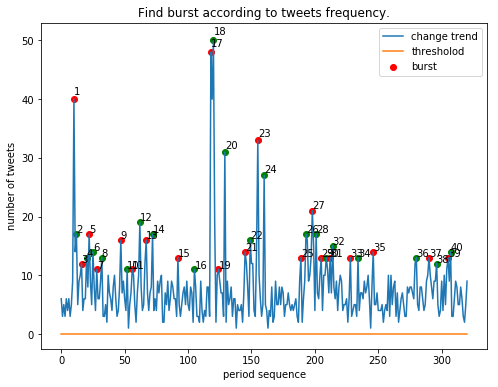

In [12]:
#plot a graph showing the location of bursts
n_burst = 40
threshold = 0
ind_burst, list_word = find_burst(frequency, accumulated_num,terms_stop, threshold, n_burst)
figsize = (8,6)
%matplotlib inline
plot_burst(ind_burst, figsize, frequency, threshold)

In [13]:
#quasi clique algorith
gamma = 0.45
numClique = 12
num_words = 150
ignore = 'iphone'
list_date, list_whole, list_clique = find_event(keyword, ignore, ind_burst, list_word, accumulated_num, terms_stop, whole_tweets, dates)

In [14]:
#how many events detected from the given bursts
len(list_date)

23

In [16]:
#print the tweets corresponding to cliques
for i in list_whole:
    print i
    print " "

RT @nokiamobile: @divyangtopiwala Hi there, the Nokia 8 is Qualcomm® Quick Charge™ 3.0 compatible, meaning when your battery is runn… 
 
@Airtel_Presence My Airtel number =8967479427
Alternate number=8864078148
My handset model=Nokia 101 dual sim
 
Charged up my old Nokia 808 Pureview to take some snow pictures, you forget how far ahead of it's time the camera was and still is.
 
My side girl got a Nokia 3310 with the screen intact, still hit me back right away, tawali g3t tit rasil Lai
 
iPhone's body, Nokia's battery, Samsung's application, Esia's price. Perfect gadget.
 
The Nokia 6 (2018) arrives with a big spec upgrade and on-screen buttons
 
i bet in 2000 years theyre gonna be digging up the rubble of our destroyed earth and they’ll find a nokia still on half battery
 
RT @nokia: Federico Guillén on "The power of AND": Combining fixed and  wireless to connect people sooner. He urges to leverag… 
 
RT @yudalaonline: No need for a power-bank when you've got the Nokia 2 with 48 hour

In [10]:
#save the results in excel or show it
df_p = pd.DataFrame({'Date': list_date, 'Clique Words': list_clique, 'Tweets':list_whole})
df_p = df_p.sort_values('Date')
df_p
#df_p.to_excel(str(keyword)+'20.xlsx', sheet_name='sheet1', index=False)

,Clique Words,Date,Tweets
2,"[nokia, security, stores, overall, game, app, ...",2017-11-15 06:20:49,RT @GetIDShield: Nokia says third-party Androi...
3,"[nokia, battery, india, launched, jio, nougat,...",2017-11-23 12:09:02,"RT @digitindia: Nokia 2 with #Android Nougat, ..."
5,"[nokia, unlock, delivery, clean, fast, premium...",2017-11-28 13:58:44,RT @freesimunlocker: This a a Premium and fast...
7,"[nokia, screen, however, gen, full, display, t...",2017-12-05 04:58:31,RT @tech2eets: It doesn't look like the @Nokia...
1,"[nokia, fixed, guill, combining, power, wirele...",2017-12-12 10:27:03,"RT @nokia: Federico Guillén on ""The power of A..."
4,"[nokia, screen, android, squares, apple, oled,...",2017-12-23 05:03:43,Android Nokia 9 squares up to Apple iPhone X w...
6,"[nokia, screen, taking, attractions, side, top...",2017-12-29 05:31:43,RT @MyHauteLife: Taking you through the top 5 ...
0,"[nokia, screen, upgrade, spec, buttons, arrive...",2018-01-06 02:27:34,The Nokia 6 (2018) arrives with a big spec upg...
